In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake['Type'] = 'Fack'
true['Type'] = 'True'

In [5]:
Result = pd.concat([fake,true]).sample(frac=1).reset_index(drop=True)
Result.head()

,title,text,subject,date,Type
0,Top U.S. official visits Vietnam to assess hum...,HANOI (Reuters) - A top U.S. envoy began a two...,politicsNews,"May 9, 2016",True
1,TRUMP HITS BACK After Cowgirl Congresswoman Tr...,The left is going ballistic over supposed word...,politics,"Oct 18, 2017",Fack
2,FBI has sufficient resources for Russia invest...,WASHINGTON (Reuters) - The FBI’s acting head s...,politicsNews,"May 11, 2017",True
3,WATCH: MSNBC Cuts Mic Of GOP Senator Lindsey G...,MSNBC s Casey Hunt was interviewing war-hawk a...,politics,"Jul 11, 2017",Fack
4,Democrats push for full analysis of latest Rep...,WASHINGTON (Reuters) - Democratic leaders in C...,politicsNews,"September 18, 2017",True


In [6]:
Result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Type     44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [7]:
Result['Type'].value_counts()

Fack    23481
True    21417
Name: Type, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Result['Type'] = encoder.fit_transform(Result['Type'])

In [9]:
Result.head()

,title,text,subject,date,Type
0,Top U.S. official visits Vietnam to assess hum...,HANOI (Reuters) - A top U.S. envoy began a two...,politicsNews,"May 9, 2016",1
1,TRUMP HITS BACK After Cowgirl Congresswoman Tr...,The left is going ballistic over supposed word...,politics,"Oct 18, 2017",0
2,FBI has sufficient resources for Russia invest...,WASHINGTON (Reuters) - The FBI’s acting head s...,politicsNews,"May 11, 2017",1
3,WATCH: MSNBC Cuts Mic Of GOP Senator Lindsey G...,MSNBC s Casey Hunt was interviewing war-hawk a...,politics,"Jul 11, 2017",0
4,Democrats push for full analysis of latest Rep...,WASHINGTON (Reuters) - Democratic leaders in C...,politicsNews,"September 18, 2017",1


In [10]:
Result = Result.drop(['title','subject','date'],axis=1)
Result.head()

,text,Type
0,HANOI (Reuters) - A top U.S. envoy began a two...,1
1,The left is going ballistic over supposed word...,0
2,WASHINGTON (Reuters) - The FBI’s acting head s...,1
3,MSNBC s Casey Hunt was interviewing war-hawk a...,0
4,WASHINGTON (Reuters) - Democratic leaders in C...,1


In [11]:
import nltk
import wordcloud
from nltk.corpus import stopwords
from textblob import Word
from collections import Counter

In [12]:
Result['No_of_Characters'] = Result['text'].apply(len)

In [13]:
Result['No_of_word'] = Result['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
Result['No_of_sentences'] = Result['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
Result.head()

,text,Type,No_of_Characters,No_of_word,No_of_sentences
0,HANOI (Reuters) - A top U.S. envoy began a two...,1,1995,362,10
1,The left is going ballistic over supposed word...,0,3342,638,25
2,WASHINGTON (Reuters) - The FBI’s acting head s...,1,744,138,4
3,MSNBC s Casey Hunt was interviewing war-hawk a...,0,1828,356,14
4,WASHINGTON (Reuters) - Democratic leaders in C...,1,606,103,2


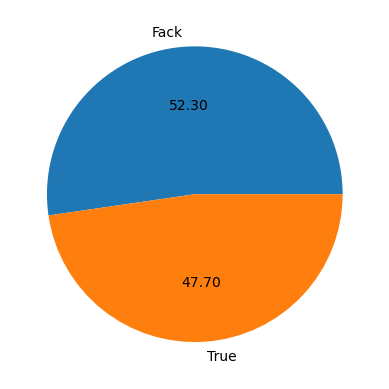

0    23481
1    21417
Name: Type, dtype: int64

In [16]:
plt.pie(Result['Type'].value_counts(),labels=['Fack','True'],autopct="%0.2f")
plt.show()
Result['Type'].value_counts()

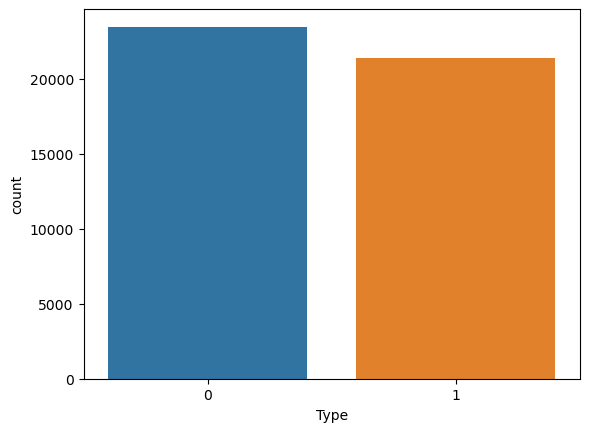

In [17]:
sns.countplot(Result.Type);

In [18]:
fake_news = Result[(Result.Type ==0)]
percent=len(fake_news)/len(Result)*100
print('Percentage of Fake = ',percent)
print('Percentage of not Fake news= ', (100-percent))

Percentage of Fake =  52.29854336496058
Percentage of not Fake news=  47.70145663503942


In [19]:
Result[['No_of_Characters','No_of_word','No_of_sentences']].describe()

,No_of_Characters,No_of_word,No_of_sentences
count,44898.000000,44898.000000,44898.000000
mean,2469.109693,453.441601,14.838055
std,2171.617091,394.771056,12.622402
min,1.000000,0.000000,0.000000
25%,1234.000000,226.000000,7.000000
50%,2186.000000,403.000000,13.000000
75%,3105.000000,572.000000,19.000000
max,51794.000000,9958.000000,321.000000


In [20]:
Result[Result['Type'] == 0][['No_of_Characters','No_of_word','No_of_sentences']].describe()

,No_of_Characters,No_of_word,No_of_sentences
count,23481.000000,23481.000000,23481.000000
mean,2547.396235,470.031174,14.856863
std,2532.884399,457.145297,13.668763
min,1.000000,0.000000,0.000000
25%,1433.000000,266.000000,7.000000
50%,2166.000000,403.000000,12.000000
75%,3032.000000,562.000000,19.000000
max,51794.000000,9958.000000,288.000000


In [21]:
Result[Result['Type'] == 1][['No_of_Characters','No_of_word','No_of_sentences']].describe()

,No_of_Characters,No_of_word,No_of_sentences
count,21417.000000,21417.000000,21417.000000
mean,2383.278517,435.253257,14.817435
std,1684.835730,311.384046,11.365309
min,1.000000,0.000000,0.000000
25%,914.000000,168.000000,6.000000
50%,2222.000000,404.000000,13.000000
75%,3237.000000,589.000000,20.000000
max,29781.000000,5979.000000,321.000000


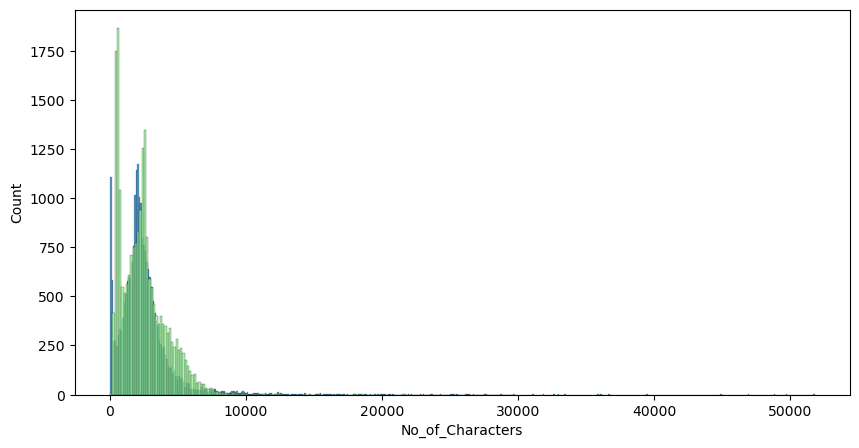

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(Result[Result['Type'] == 0]['No_of_Characters'])
sns.histplot(Result[Result['Type'] == 1]['No_of_Characters'],color='lightgreen')
plt.show()

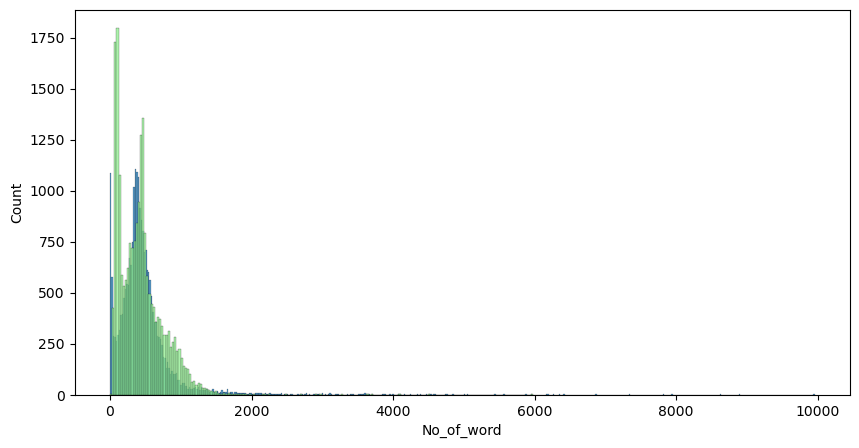

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(Result[Result['Type'] == 0]['No_of_word'])
sns.histplot(Result[Result['Type'] == 1]['No_of_word'],color='lightgreen')
plt.show()

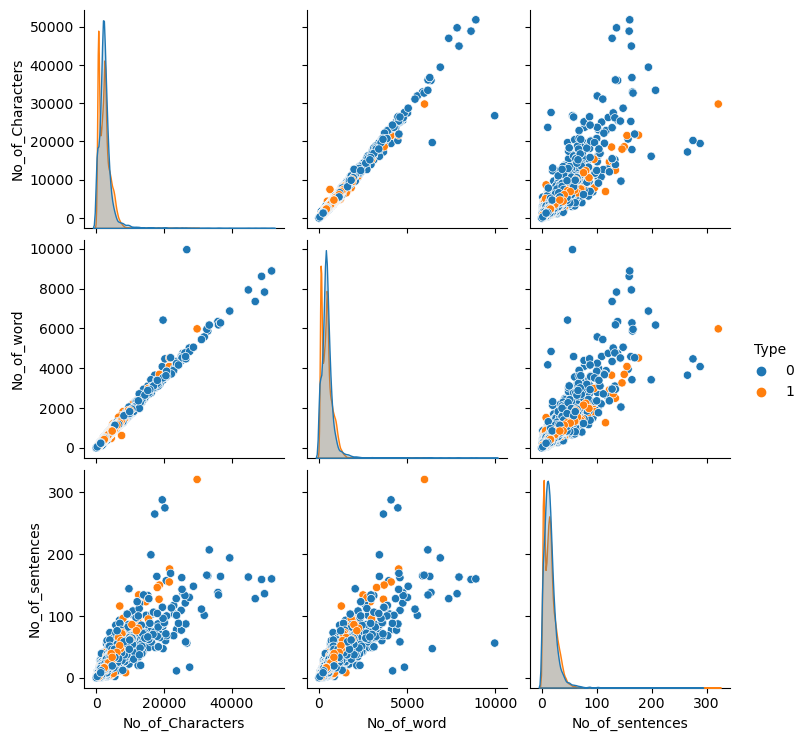

In [24]:
sns.pairplot(Result,hue='Type');

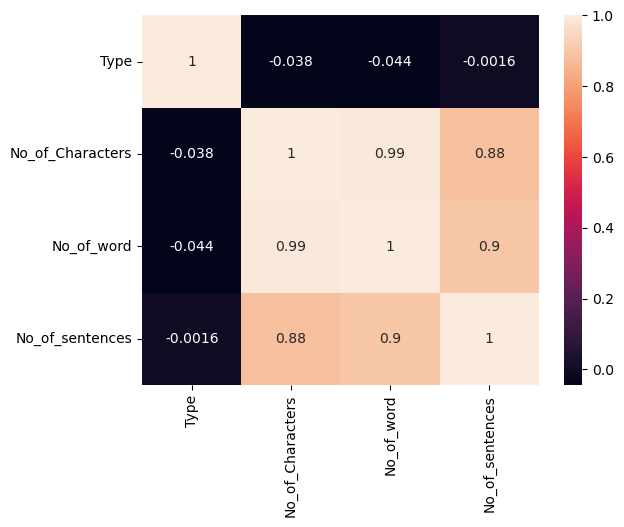

In [25]:
sns.heatmap(Result.corr(),annot=True);

### Text Mining

In [26]:
from nltk.corpus import stopwords
def clean_text(Result, Result_column_name):
    
    #Converting all messages to lowercase
    Result[Result_column_name] = Result[Result_column_name].str.lower()

    #Replace email addresses with 'email'
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    Result[Result_column_name] = Result[Result_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    Result[Result_column_name] = Result[Result_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [27]:
clean_text(Result, 'text')
Result['text'].head()

0    pepsi got hammered everyone lame attempt glamo...
1    manila reuters three russian warships includin...
2    rome reuters italian prime minister paolo gent...
3    canfield ohio cleveland reuters donald trump h...
4    washington reuters federal appeals court monda...
Name: text, dtype: object

## Word Cloud
#### 1- Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.
#### 2- The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.
#### 3- The enlarged texts are the most number of words used there and small texts are the less number of words used.

### Word cloud of Fack Text

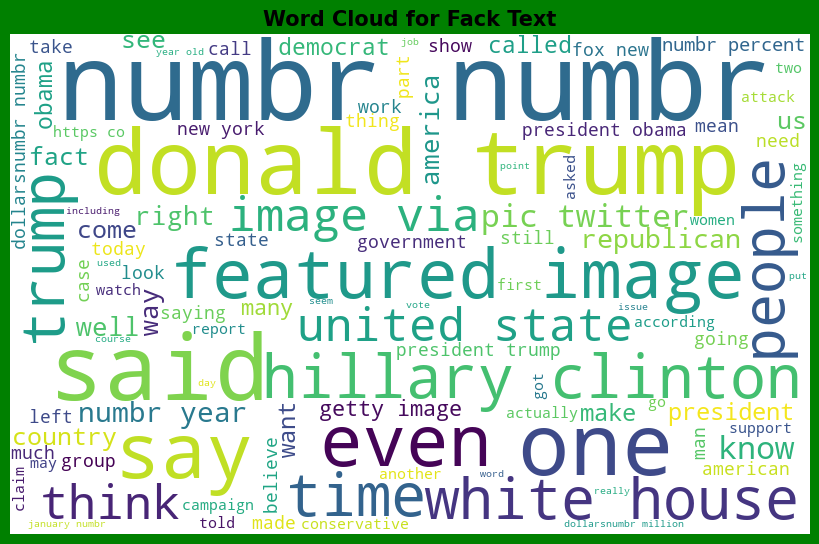

In [28]:
# Word cloud of Fack Text
zero = Result['text'][Result['Type'] == 0]
zero_cloud = wordcloud.WordCloud(width = 800, height = 500, background_color = 'white', max_words = 100).generate(' '.join(zero))
plt.figure(figsize = (8,8), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Fack Text', fontsize= 15, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### word cloud of Text

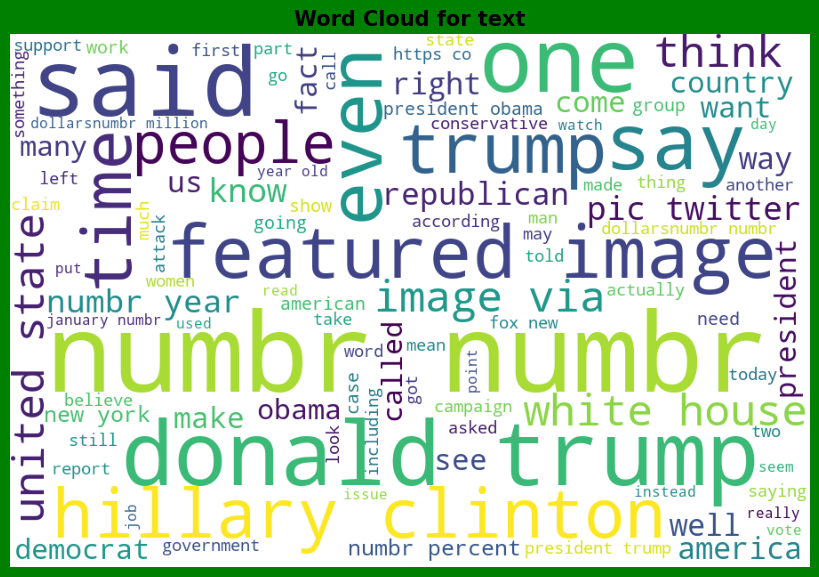

In [29]:
# word cloud of Text
one = Result['text'][Result['Type'] == 1]
one_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(''.join(zero))
plt.figure(figsize =(8,8), facecolor = 'g')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for text', fontsize = 15, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### Top 20 Fack Word in Text Corpus

In [30]:
Fack_corpus = []
for i in Result[Result['Type'] == 0]['text'].tolist():
    for word in i.split():
        Fack_corpus.append(word)

In [31]:
len(Fack_corpus)

5296922

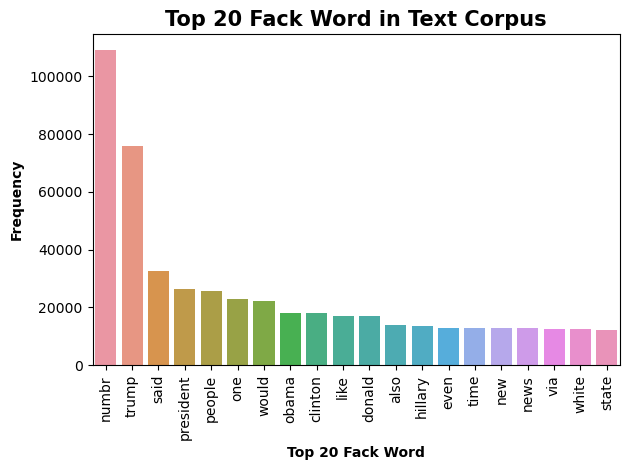

In [32]:
from collections import Counter
count= sns.barplot(pd.DataFrame(Counter(Fack_corpus).most_common(20))[0],pd.DataFrame(Counter(Fack_corpus).most_common(20))[1])
count.set_xlabel("Top 20 Fack Word", fontsize=10, fontweight = 'bold')
count.set_ylabel("Frequency", fontsize=10, fontweight = 'bold')
plt.title('Top 20 Fack Word in Text Corpus', fontsize=15, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

### Top 20 Spam Word in Text Corpus

In [33]:
Text_corpus = []
for i in Result[Result['Type'] == 1]['text'].tolist():
    for word in i.split():
        Text_corpus.append(word)

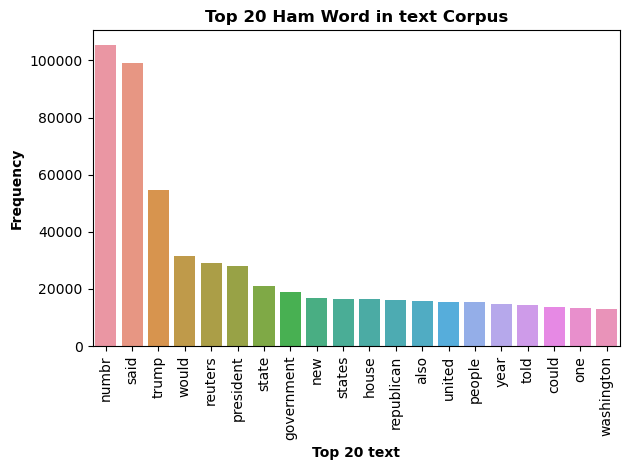

In [34]:
from collections import Counter
count = sns.barplot(pd.DataFrame(Counter(Text_corpus).most_common(20))[0],pd.DataFrame(Counter(Text_corpus).most_common(20))[1])
count.set_xlabel('Top 20 text',fontsize = 10 ,fontweight = 'bold')
count.set_ylabel('Frequency',fontsize = 10, fontweight = 'bold')
plt.title('Top 20 Ham Word in text Corpus', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

### Text Vectorization to convert text into numeric

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
fertures = tf.fit_transform(Result['text'])
X=fertures
Y=Result[['Type']]

## Train Test Split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : 0.9475834417164274
Mean Absolute Error(MAE) 0.013066072754268746
Mean Squared Error 0.013066072754268746
Root Mean Squared Error 0.11430692347477797
-----------------------------------------------------
0.9869339272457313
-----------------------------------------------------
[[6999   99]
 [  77 6295]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7098
           1       0.98      0.99      0.99      6372

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



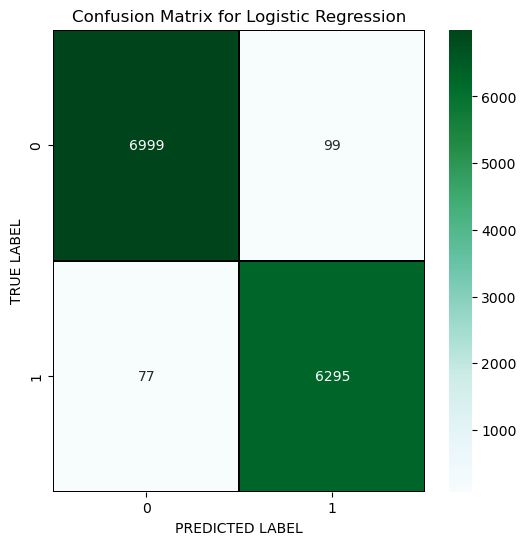

In [39]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Logistic Regression');

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.9919588234451338
Mean Absolute Error 0.0020044543429844097
Mean Squared Error 0.0020044543429844097
Root Mean Squared Error 0.04477113292049253
-----------------------------------------------------
Accuracy Score:  0.9979955456570155
-----------------------------------------------------
Confusion Matrix:
 [[7082   16]
 [  11 6361]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7098
           1       1.00      1.00      1.00      6372

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



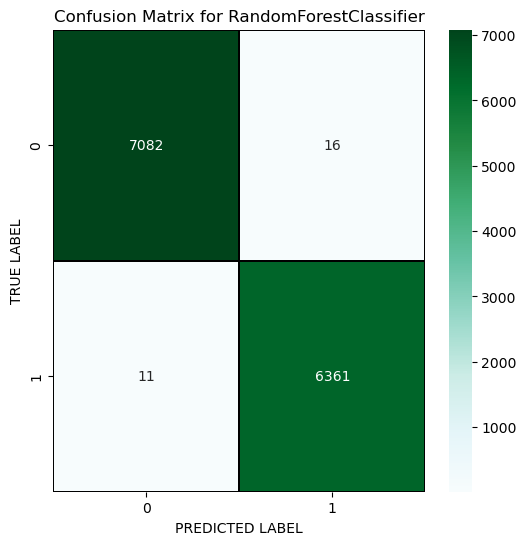

In [41]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## MultinomialNB Classifier

In [43]:
from sklearn.naive_bayes import MultinomialNB

# Checking accuracy for MultinomialNB Classifier
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

# [Prediction]
predMNB = MNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predMNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predMNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predMNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predMNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predMNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predMNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predMNB))

R2 Score: 0.7298760320272706
Mean Absolute Error 0.06733481811432813
Mean Squared Error 0.06733481811432813
Root Mean Squared Error 0.25948953372791
-----------------------------------------------------
Accuracy Score:  0.9326651818856718
-----------------------------------------------------
Confusion Matrix:
 [[6673  425]
 [ 482 5890]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7098
           1       0.93      0.92      0.93      6372

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



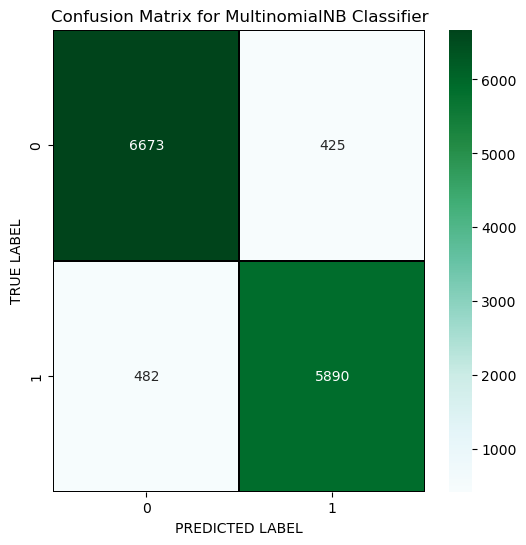

In [44]:
cm = confusion_matrix(Y_test,predMNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for MultinomialNB Classifier')
plt.show()

## BernoulliNB

In [45]:
from sklearn.naive_bayes import BernoulliNB

# Checking accuracy for BernoulliNB Classifier
BNB = BernoulliNB()
BNB.fit(X_train,Y_train)

# [Prediction]
predBNB = BNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predBNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predBNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predBNB))

R2 Score: 0.8528762511813359
Mean Absolute Error 0.036674090571640686
Mean Squared Error 0.036674090571640686
Root Mean Squared Error 0.19150480560978278
-----------------------------------------------------
Accuracy Score:  0.9633259094283593
-----------------------------------------------------
Confusion Matrix:
 [[6850  248]
 [ 246 6126]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7098
           1       0.96      0.96      0.96      6372

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



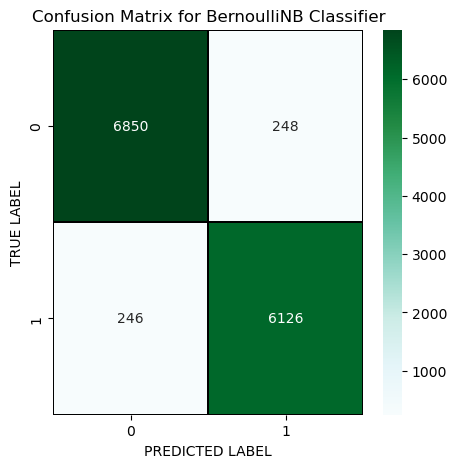

In [46]:
cm = confusion_matrix(Y_test,predBNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BernoulliNB Classifier')
plt.show()

## Extra Trees Classifier

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Extra Trees Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.9669418297188832
Mean Absolute Error 0.00824053452115813
Mean Squared Error 0.00824053452115813
Root Mean Squared Error 0.09077738992259102
-----------------------------------------------------
Accuracy Score:  0.9917594654788419
-----------------------------------------------------
Confusion Matrix:
 [[7013   85]
 [  26 6346]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7098
           1       0.99      1.00      0.99      6372

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



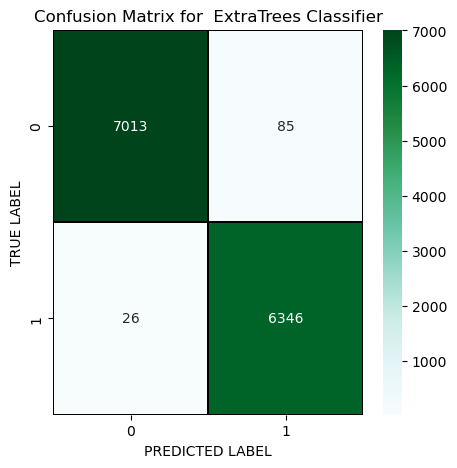

In [48]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

## AdaBoostClassifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.9818328974130799
Mean Absolute Error 0.004528582034149963
Mean Squared Error 0.004528582034149963
Root Mean Squared Error 0.06729474001844396
-----------------------------------------------------
Accuracy Score:  0.99547141796585
-----------------------------------------------------
Confusion Matrix:
 [[7066   32]
 [  29 6343]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7098
           1       0.99      1.00      1.00      6372

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



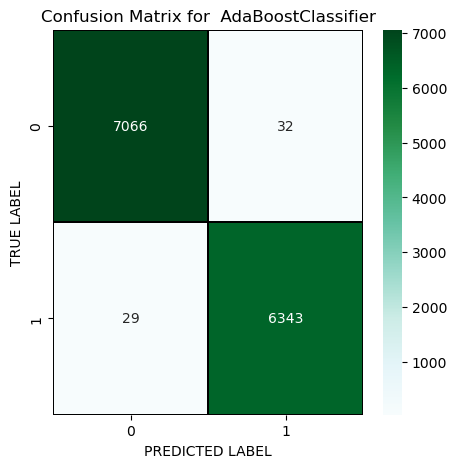

In [50]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

## Support Vector Machine Classifier

In [51]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.9696222219038386
Mean Absolute Error 0.0075723830734966595
Mean Squared Error 0.0075723830734966595
Root Mean Squared Error 0.0870194407790389
-----------------------------------------------------
Accuracy Score:  0.9924276169265034
-----------------------------------------------------
Confusion Matrix:
 [[7041   57]
 [  45 6327]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7098
           1       0.99      0.99      0.99      6372

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



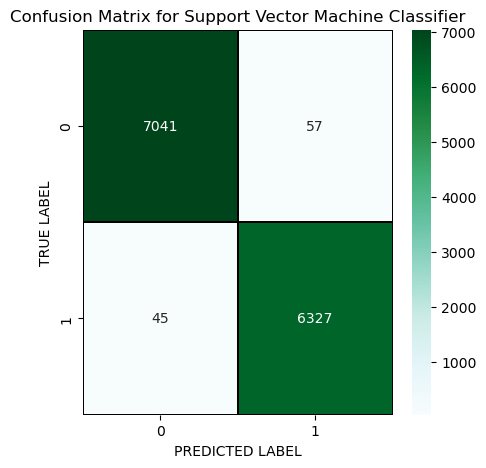

In [52]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## Cross Validation Score

In [53]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('BernoulliNB Classifier:',cross_val_score(BNB,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(ETC,X,Y,cv=5).mean())

# cv score for Naive Bias Classifier
print('MultinomialNB Classifier:',cross_val_score(MNB,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())

Logistic Regression 0.9881509218118694
Random Forest Classifier 0.9980623012716382
BernoulliNB Classifier: 0.962225519530724
Support Vector  Classifier 0.9938972822257132
Extra Trees Classifier: 0.9922936865058312
MultinomialNB Classifier: 0.9325360833283105
AdaBoosting Classifier: 0.9953672947840928


## Hyperparameter Tuning

In [54]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [55]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [56]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [57]:
Fack_news= RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=100, n_jobs=-2, random_state=1000)
Fack_news.fit(X_train, Y_train)
pred = Fack_news.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 99.74016332590942


In [58]:
import joblib
joblib.dump(Fack_news,"Fack_News.pkl")

['Fack_News.pkl']